<a href="https://colab.research.google.com/github/TienLungSun/Intelligent-camera/blob/main/Wavelet%20transform(IMU%20sensor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load data file to colab
from google.colab import files
uploaded = files.upload()

Saving LOGGER01.CSV to LOGGER01 (1).CSV


In [2]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

LOGGER01.CSV


In [3]:
import pandas as pd
df=pd.read_csv(fname)

In [4]:
df.head(3)

,X,Y,Z
0,11.10,2.24,-4.67
1,11.02,2.16,-4.86
2,11.02,2.16,-4.82


In [5]:
df.columns

Index(['X', 'Y', 'Z'], dtype='object')

In [6]:
#select a column
dfx = df['X']

In [7]:
#convert to numpy array
import numpy as np
x = np.array(dfx.values)
print(x.shape)

(801,)


Convert to complex Morlet wavelet

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.morlet2.html

In [8]:
from scipy import signal
import matplotlib.pyplot as plt

In [16]:
length = x.shape[0]

In [17]:
t, dt = np.linspace(0, 1, length, retstep=True)
fs = 1/dt
w = 6.
freq = np.linspace(1, fs/2, 100)
widths = w*fs / (2*freq*np.pi)

In [18]:
cwtm = signal.cwt(x, signal.morlet2, widths, w=w)

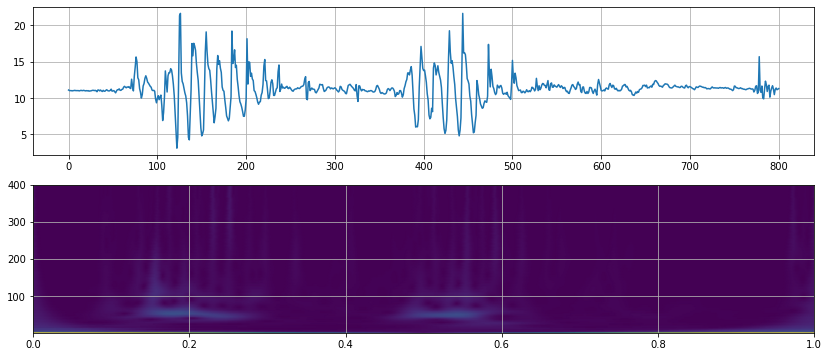

In [24]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(14, 6))
fig.add_subplot(2, 1, 1) 
plt.plot(x)
plt.grid()

fig.add_subplot(2, 1, 2) 
plt.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
plt.grid()
plt.show()

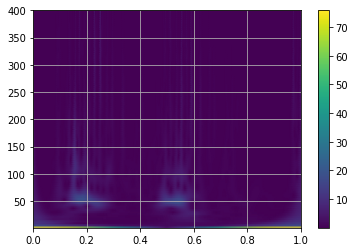

In [22]:
# show color bar
plt.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
plt.grid()
plt.colorbar()
plt.show()

Convert time series to 2D images

Reference: https://blog.octo.com/en/time-series-features-extraction-using-fourier-and-wavelet-transforms-on-ecg-data/


https://towardsdatascience.com/multiple-time-series-classification-by-using-continuous-wavelet-transformation-d29df97c0442

In [ ]:
import pywt

In [ ]:
scales = np.arange(1, 65) # range of scales
wavelet = 'morl' # mother wavelet

In [ ]:
# apply PyWavelets continuous wavelet transfromation function
coeffs, freqs = pywt.cwt(x, scales, wavelet = wavelet)

In [ ]:
print(coeffs.shape, freqs.shape)

(64, 750) (64,)


In [ ]:
img=np.squeeze(coeffs)
print(img.shape)

(64, 750)


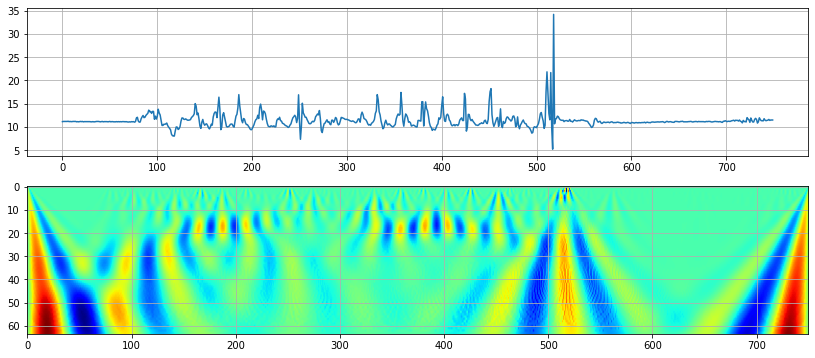

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(14, 6))
fig.add_subplot(2, 1, 1) 
plt.plot(x)
plt.grid()

fig.add_subplot(2, 1, 2) 
plt.imshow(img, cmap="jet", aspect = 'auto')
plt.grid()
plt.show()

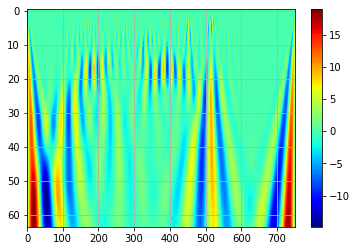

In [ ]:
# show color bar
plt.imshow(img, cmap="jet", aspect = 'auto')
plt.grid()
plt.colorbar()
plt.show()

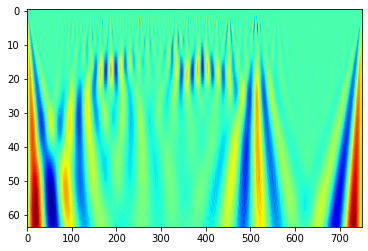

In [ ]:
# save to jpg
plt.imshow(img, cmap="jet", aspect = 'auto')
plt.savefig('ftr.jpg')

Combine together

In [ ]:
df.columns

Index(['X', 'Y', 'Z'], dtype='object')

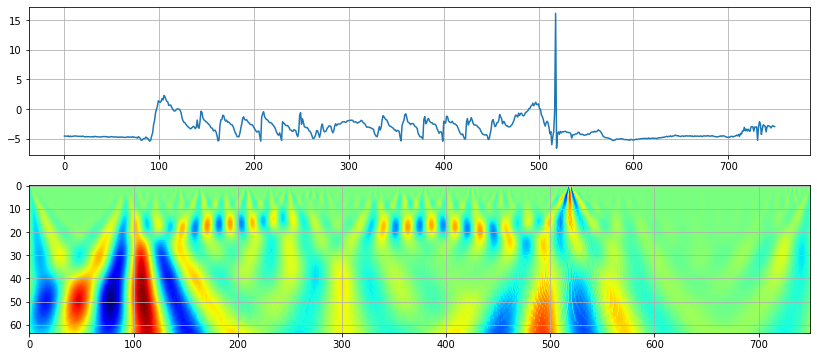

In [ ]:
dfy = df['Z']
y = np.array(dfy.values)
coeffs, freqs = pywt.cwt(y, scales, wavelet = wavelet)
img=np.squeeze(coeffs)
fig=plt.figure(figsize=(14, 6))
fig.add_subplot(2, 1, 1) 
plt.plot(y)
plt.grid()

fig.add_subplot(2, 1, 2) 
plt.imshow(img, cmap="jet", aspect = 'auto')
plt.grid()
plt.show()

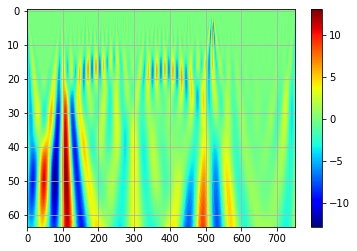

In [ ]:
plt.imshow(img, cmap="jet", aspect = 'auto')
plt.grid()
plt.colorbar()
plt.show()

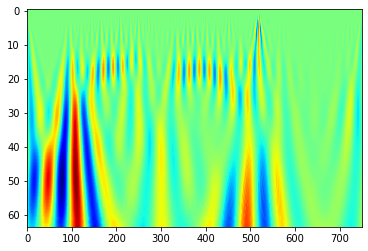

In [ ]:
plt.imshow(img, cmap="jet", aspect = 'auto')
plt.savefig('ftr.jpg')